In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_dict = pd.read_excel('nos-final.xlsx', sheet_name=["ByLearner", "Categories", "LearnerData"])
df = df_dict["ByLearner"]
learners = df_dict["LearnerData"]
categories = df_dict["Categories"].Category

In [3]:
glyphs = ['👨‍🔬', '🏫', '🧑‍🤝‍🧑', '🌎', '🌿', '🌄', '🔄', '🌀', '📚', '🧠', '🤔', '✏️', '🤷', '❓', '⚠️', '🙈']
empty_strings = ['' for glyph in glyphs]
glyph_dict = dict(zip(glyphs, empty_strings))
df = df.replace(glyph_dict, regex=True)
categories = categories.replace(glyph_dict, regex=True)

display(df.head())
display(learners.head())
display(categories)

,Sc.,No.,ID,Analysis Group,Q1,Q2,Q3,Q4,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6
0,5,18,7,training,Discovery of how [colestriol?] and living bodi...,Discover new things about living organisms.,BLANK,BLANK,3a. Science Studies Things,4a. Science Produces Knowledge,NaN,NaN,NaN,NaN
1,5,36,81,training,Science is a platform that helps in our everyd...,Scientists are like general researchers they d...,NaN,I draw this picture to resemble the experiment...,2. Human Centred,4a. Science Produces Knowledge,1. Lab & School Activity,NaN,NaN,NaN
2,5,15,22,training,It is the study of scientific things and thing...,I think they deal with chemicals and chemical ...,NaN,To show the scientist is dealing with chemicals,1. Lab & School Activity,3a. Science Studies Things,NaN,NaN,NaN,NaN
3,5,32,35,training,People who mix chemicals in order to discover ...,mix chemicals write/discover formulas to find ...,NaN,because scientists mix chemicals,1. Lab & School Activity,3a. Science Studies Things,NaN,NaN,NaN,NaN
4,5,42,53,training,It is the term that helps us know the earth be...,They research more about the earth and its bio...,NaN,They look into the life/earth deeply,3a. Science Studies Things,NaN,NaN,NaN,NaN,NaN


,Sc.,No.,ID,Age,Sex,Grade,Science?,Technology?
0,3,1,9,15.0,F,10,Y,N
1,3,2,82,16.0,F,10,NaN,NaN
2,3,3,20,16.0,F,10,Y,N
3,3,4,5,15.0,F,10,Y,N
4,3,5,86,16.0,F,10,Y,N


0             1.  Lab & School Activity 
1                     2.  Human Centred 
2           3a.  Science Studies Things 
3        3b.  Science Studies Phenomena 
4        4a.  Science Produces Knowledge
5    4b.  Science Produces Understanding
6         5.  Science Involve Processes 
7                       Uncategorisable 
Name: Category, dtype: object

In [4]:
def pipeline(df):   
    codes = [f'Category {x}' for x in range(1,7)]
    df = pd.melt(df, id_vars=['ID'], value_vars=codes)
    df.dropna(inplace=True)
    df = df.merge(learners[['ID', 'Grade', 'Sc.']], how='left', on='ID')
    df.rename(columns={'ID': 'id', 'value': 'category', 'Grade': 'grade', 'Sc.': 'school'}, inplace=True)
    return df[['id', 'category', 'school', 'grade']]
    
df = pipeline(df)
display(df.head())

,id,category,school,grade
0,7,3a. Science Studies Things,5,9
1,81,2. Human Centred,5,9
2,22,1. Lab & School Activity,5,9
3,35,1. Lab & School Activity,5,9
4,53,3a. Science Studies Things,5,9


,group,size
0,10 (10),19
1,10 (3),21
2,7 (4),18
3,9 (5),28


,category,group,frequency,size,perc
0,1. Lab & School Activity,10 (10),9,19,47.0
1,1. Lab & School Activity,10 (3),13,21,62.0
2,1. Lab & School Activity,7 (4),7,18,39.0
3,1. Lab & School Activity,9 (5),14,28,50.0
4,2. Human Centred,10 (10),9,19,47.0
5,2. Human Centred,10 (3),6,21,29.0
6,2. Human Centred,7 (4),10,18,56.0
7,2. Human Centred,9 (5),12,28,43.0
8,3a. Science Studies Things,10 (10),10,19,53.0
9,3a. Science Studies Things,10 (3),13,21,62.0


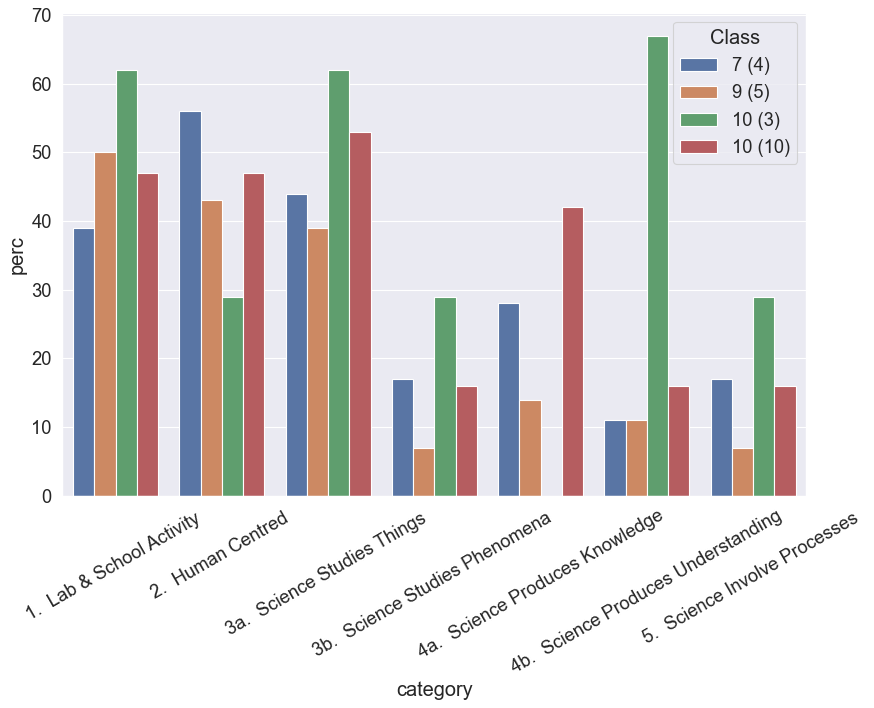

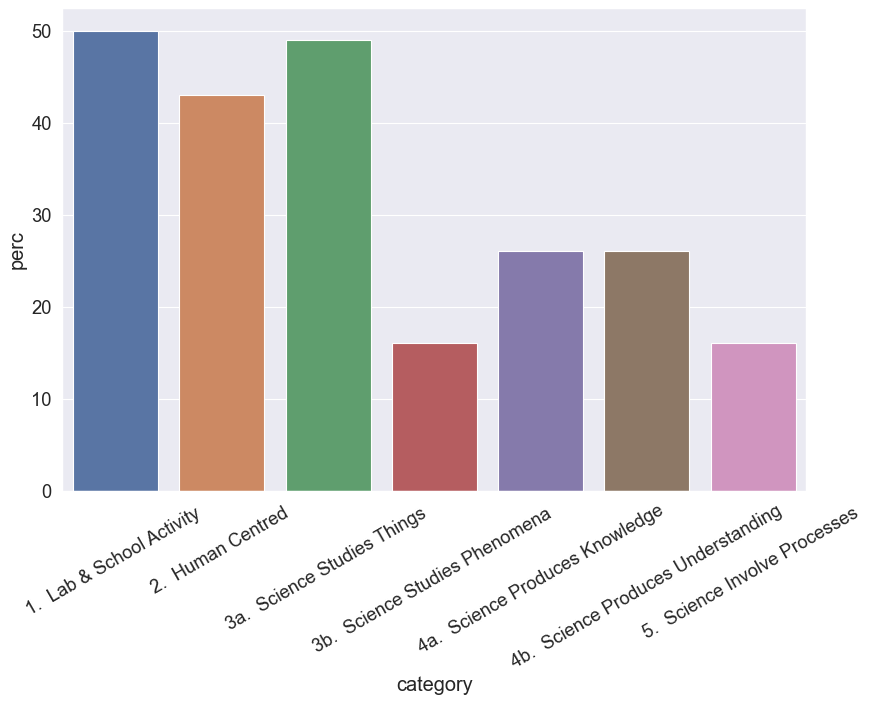

In [26]:
df['group'] = df['grade'].astype(str) + ' (' + df['school'].astype(str) + ')'
df_groups = df[['group', 'id']].groupby('group', as_index=False).nunique()
df_groups.rename(columns={'id': 'size'}, inplace=True)

display(df_groups)

df_cats = df[['category', 'group', 'id']].groupby(['category', 'group'], as_index=False).count()
df_cats = df_cats.iloc[2:,:]
df_cats.rename(columns={'id': 'frequency'}, inplace=True)

df_cats = df_cats.merge(df_groups, on='group', how='left')

df_cats['perc'] = df_cats['frequency'].div(df_cats['size']).mul(100).round()

display(df_cats.head(27))



fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_cats, x='category', y='perc', hue='group', hue_order=['7 (4)', '9 (5)', '10 (3)', '10 (10)'], palette='deep')
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles[0:4], labels[0:4])
leg.set_title('Class')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

df_all = df_cats[['category', 'frequency', 'size']].groupby('category', as_index=False).sum()
df_all['perc'] = df_all['frequency'].div(df_all['size']).mul(100).round()

fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_all, x='category', y='perc', palette='deep')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

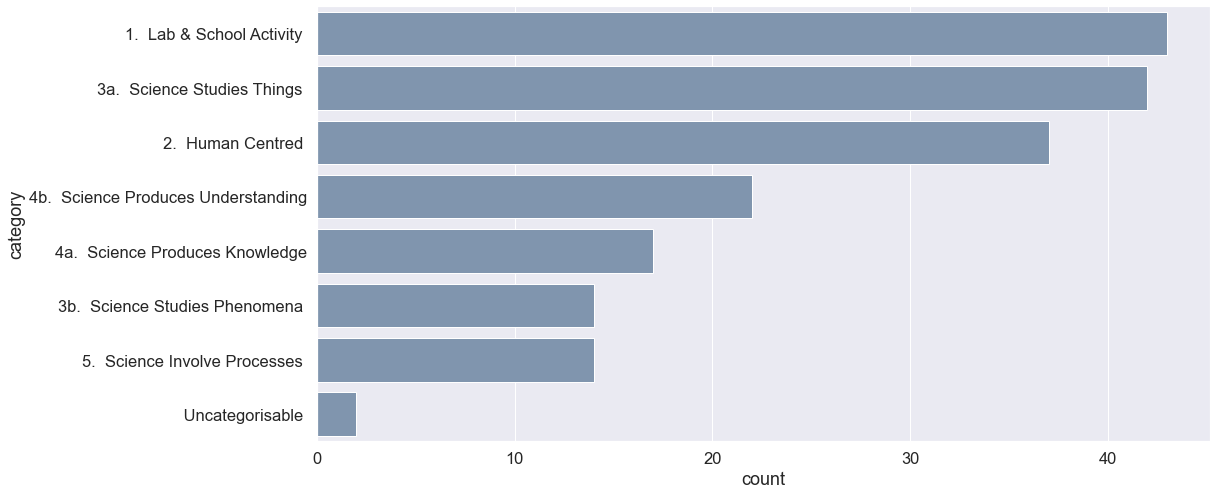

,id
category,
Uncategorisable,2
1. Lab & School Activity,43
2. Human Centred,37
3a. Science Studies Things,42
3b. Science Studies Phenomena,14
4a. Science Produces Knowledge,17
4b. Science Produces Understanding,22
5. Science Involve Processes,14


,id,category,school,grade,group
count,191.000000,191,191.000000,191.000000,191
unique,NaN,8,NaN,NaN,4
top,NaN,1. Lab & School Activity,NaN,NaN,10 (3)
freq,NaN,43,NaN,NaN,58
mean,43.607330,NaN,5.366492,9.130890,NaN
std,24.895312,NaN,2.685581,1.160145,NaN
min,1.000000,NaN,3.000000,7.000000,NaN
25%,22.000000,NaN,3.000000,9.000000,NaN
50%,42.000000,NaN,4.000000,10.000000,NaN
75%,66.000000,NaN,5.000000,10.000000,NaN


Categories per learner: 2.2


In [6]:
# add some custom words to stopwords
# stopwords = set(STOPWORDS)
# stopwords.update(["science", "scientific", "scientist", "scientists", "thing", "things"])

def question_analysis(df, unique=False):
    
    if unique:
        df.drop_duplicates(inplace=True)
        
    plt.figure(figsize=(16, 8))
    sns.countplot(y='category', data=df, order = df['category'].value_counts().index, color='#7895B6')
    plt.show()
    
    # df_count = df[['category', 'grade', 'id']].groupby(['category', 'grade']).count()
    df_count = df[['category', 'id']].groupby(['category']).count()
    display(df_count)
    display(df.describe(include='all'))
    
    categories_per_learner = round(df.groupby('id').agg(['count']).mean()[0], 1)
    print("Categories per learner: {}".format(categories_per_learner))
    
    #q_text = " ".join(category for category in df.category).lower()
        
    #     # create and generate a word cloud image
    #     wc = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, scale=2).generate(q_text)

    #     # Display the generated image:
    #     plt.figure(figsize=(16, 8))
    #     plt.imshow(wc, interpolation='bilinear')
    #     plt.axis("off")
    #     plt.show()
    
question_analysis(df)

In [7]:
# relationship between what is studied and what is produced

x = [
    '3a.  Science Studies Things ',
    '3b.  Science Studies Phenomena ',
    '4a.  Science Produces Knowledge',
    '4b.  Science Produces Understanding'
]

df2 = df[df.category.isin(x)]
df3 = pd.pivot_table(df2, values='school', index=['id'], columns=['category'])
df4 = df3 > 1
df4.head()

category,3a. Science Studies Things,3b. Science Studies Phenomena,4a. Science Produces Knowledge,4b. Science Produces Understanding
id,,,,
1,False,True,False,False
2,True,False,False,False
3,False,False,True,False
4,False,False,False,True
5,False,False,False,True


In [8]:
(df4.iloc[:, 1] | df4.iloc[:, 2] | df4.iloc[:, 0] | df4.iloc[:, 3]).sum()

61

In [9]:
(df4.iloc[:, 0] | df4.iloc[:, 1]).sum()

51

In [10]:
(df4.iloc[:, 2] | df4.iloc[:, 3]).sum()

38

In [11]:
things = set(df4[df4.iloc[:, 0]].index)
len(things)

42

In [12]:
phenomena = set(df4[df4.iloc[:, 1]].index)
len(phenomena)

14

In [13]:
knowledge = set(df4[df4.iloc[:, 2]].index)
len(knowledge)

17

In [14]:
understanding = set(df4[df4.iloc[:, 3]].index)
len(understanding)

22

In [15]:
knowledge.intersection(understanding)

{74}

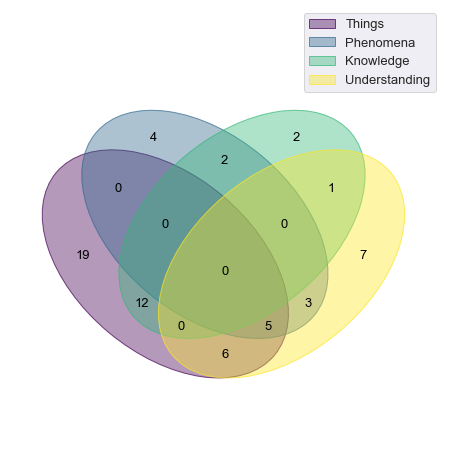

In [16]:
from venn import venn
sets = {
    "Things": things,
    "Phenomena": phenomena,
    "Knowledge": knowledge,
    "Understanding": understanding
}
venn(sets)
plt.show()

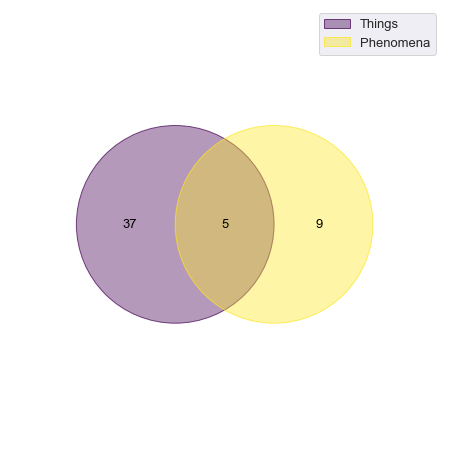

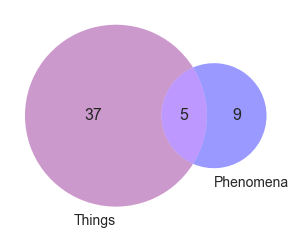

In [17]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

colors = {
    "Things": "purple",
    "Phenomena": "blue",
    "Knowledge": "green",
    "Understanding": "yellow"
}
    
def plot_sets(name1, name2):
    A = sets[name1]
    B = sets[name2]
    
    color1 = colors[name1]
    color2 = colors[name2]
    
    sets_temp = {
        name1: A,
        name2: B
    }
    venn(sets_temp)
    plt.show()
       
    ab = A.intersection(B)
    out = venn2(subsets=(len(A - ab), len(B - ab), len(ab)), set_labels=(name1, name2), set_colors=(color1, color2))
    for text in out.set_labels:
        text.set_fontsize(14)
    for text in out.subset_labels:
        text.set_fontsize(16)
    plt.show()
    
plot_sets("Things", "Phenomena")

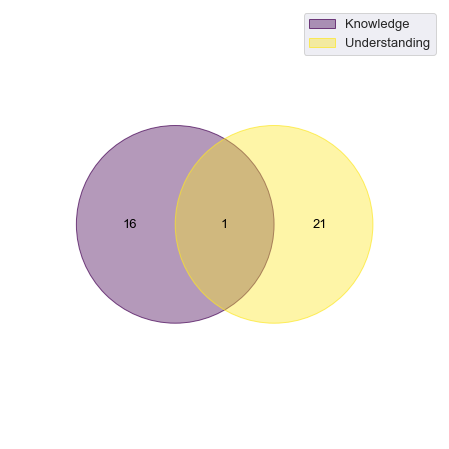

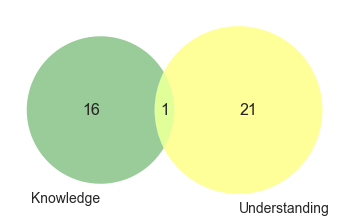

In [18]:
plot_sets("Knowledge", "Understanding")

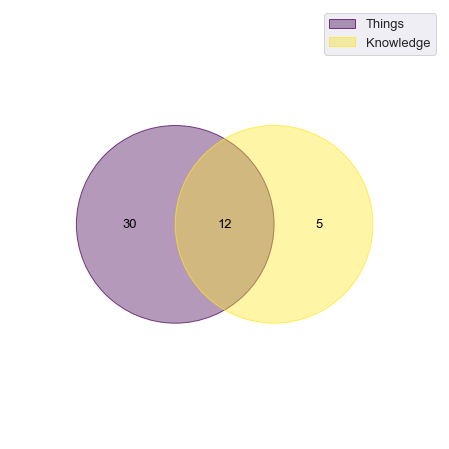

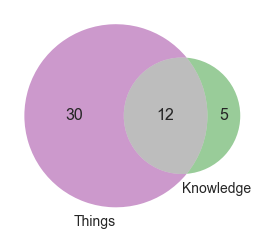

In [19]:
plot_sets("Things", "Knowledge")

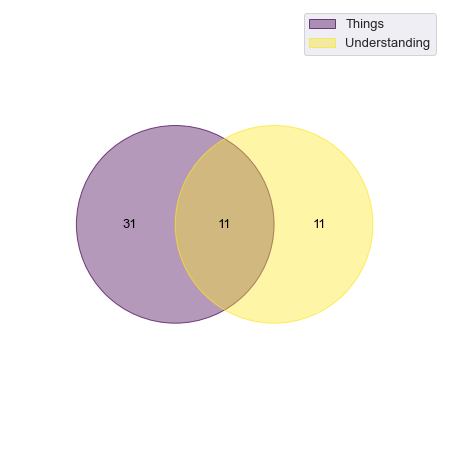

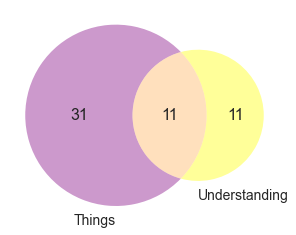

In [20]:
plot_sets("Things", "Understanding")

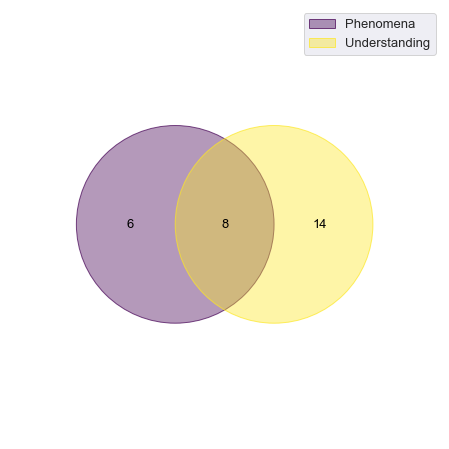

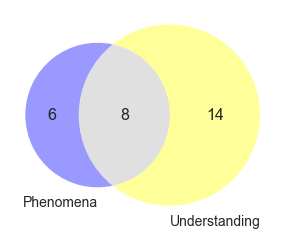

In [21]:
plot_sets("Phenomena", "Understanding")

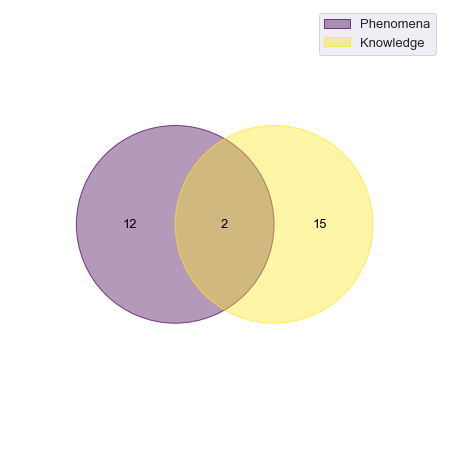

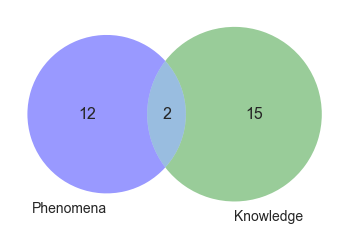

In [22]:
plot_sets("Phenomena", "Knowledge")

In [23]:
df4.corr().round(2)

category,3a. Science Studies Things,3b. Science Studies Phenomena,4a. Science Produces Knowledge,4b. Science Produces Understanding
category,,,,
3a. Science Studies Things,1.00,-0.39,0.02,-0.31
3b. Science Studies Phenomena,-0.39,1.00,-0.17,0.24
4a. Science Produces Knowledge,0.02,-0.17,1.00,-0.39
4b. Science Produces Understanding,-0.31,0.24,-0.39,1.00


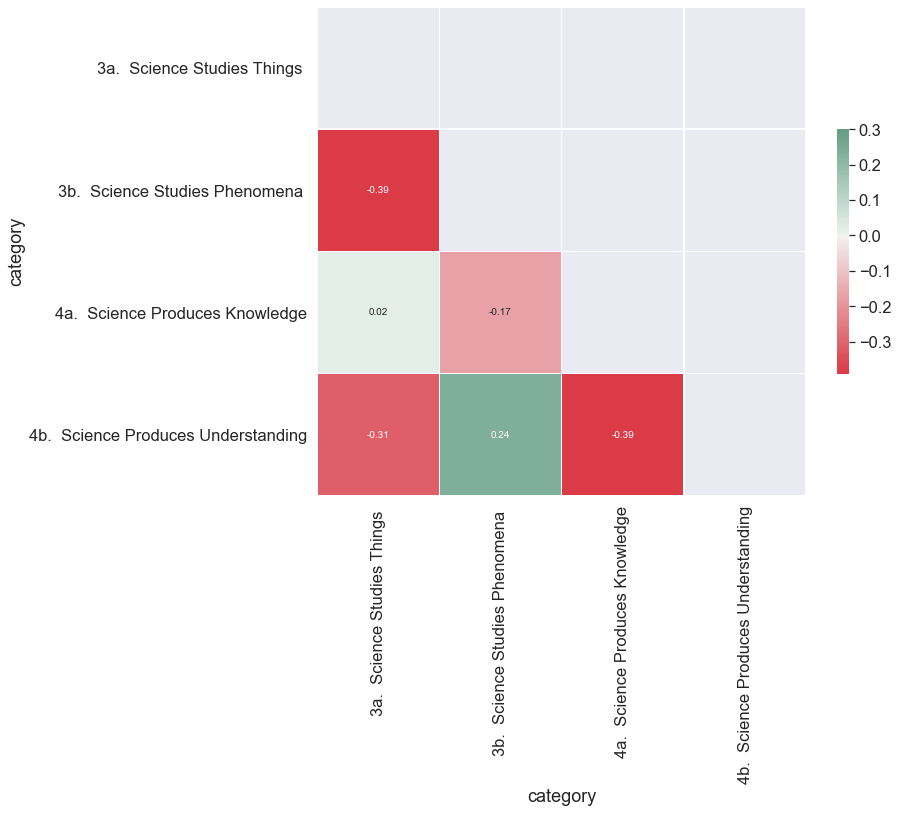

In [24]:
corr = df4.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()